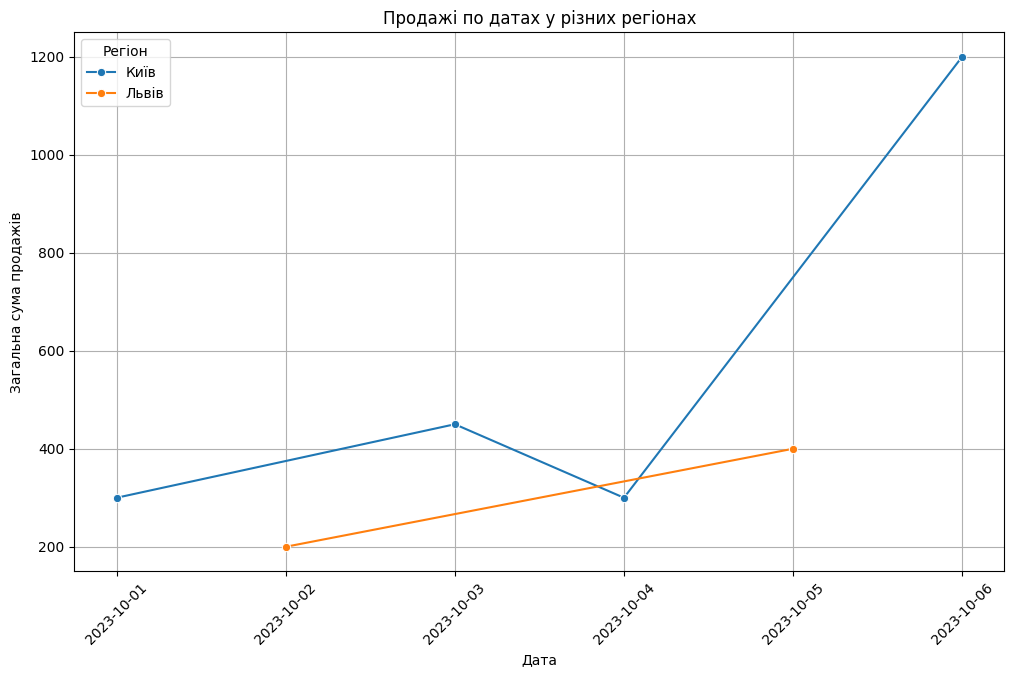

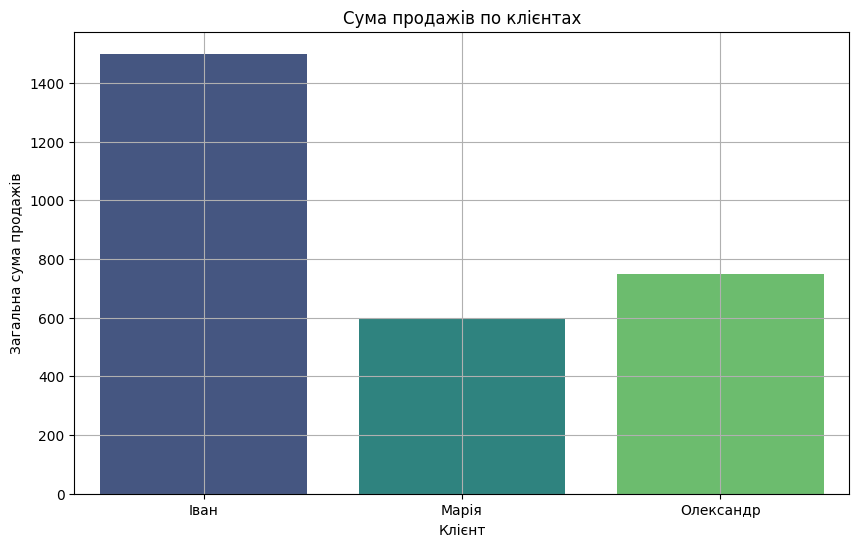

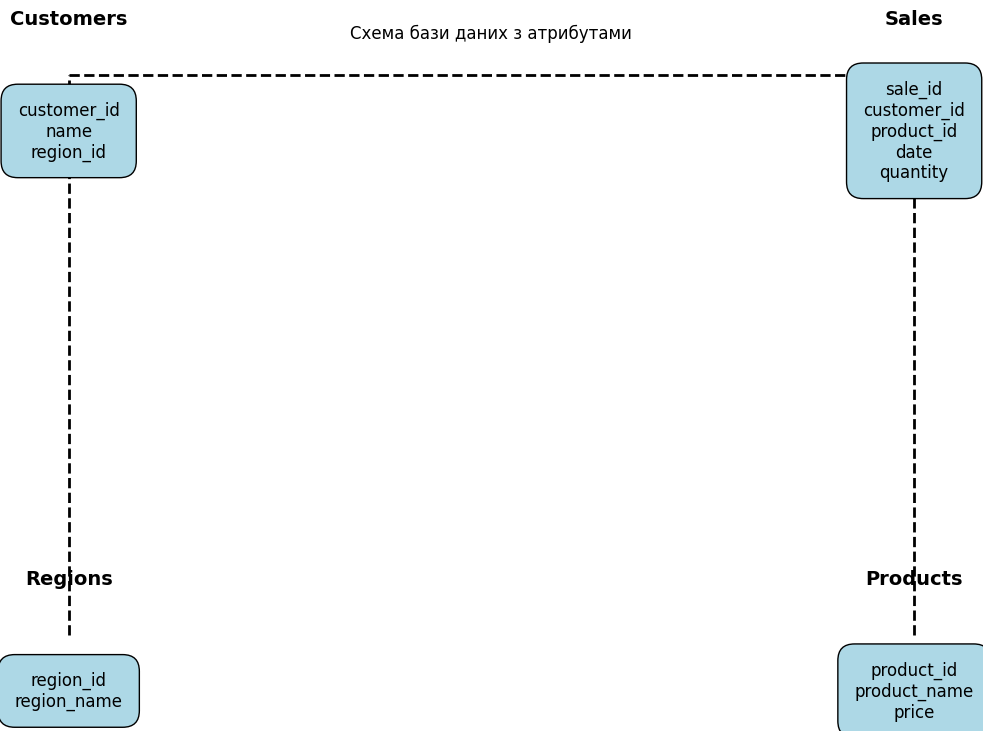

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from PIL import Image

# Створення даних для таблиць

# Таблиця клієнтів
customers_data = {
    'customer_id': [1, 2, 3],
    'name': ['Олександр', 'Марія', 'Іван'],
    'region_id': [1, 2, 1]
}
customers = pd.DataFrame(customers_data)

# Таблиця продуктів
products_data = {
    'product_id': [101, 102, 103],
    'product_name': ['Продукт A', 'Продукт B', 'Продукт C'],
    'price': [150, 200, 300]
}
products = pd.DataFrame(products_data)

# Таблиця регіонів
regions_data = {
    'region_id': [1, 2],
    'region_name': ['Київ', 'Львів']
}
regions = pd.DataFrame(regions_data)

# Таблиця продажів із датами
sales_data = {
    'sale_id': [1, 2, 3, 4, 5, 6],
    'customer_id': [1, 2, 1, 3, 2, 3],
    'product_id': [101, 102, 101, 103, 102, 103],
    'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06'],
    'quantity': [2, 1, 3, 1, 2, 4]
}
sales = pd.DataFrame(sales_data)
sales['date'] = pd.to_datetime(sales['date'])  # Перетворення дати

# Злиття таблиць та обчислення загальної вартості продажу
full_data = pd.merge(sales, customers, on='customer_id', how='left')
full_data = pd.merge(full_data, products, on='product_id', how='left')
full_data = pd.merge(full_data, regions, on='region_id', how='left')
full_data['total_sale'] = full_data['price'] * full_data['quantity']

# Агрегатні розрахунки: сума продажів по клієнтах
sales_per_customer = full_data.groupby('name')['total_sale'].sum().reset_index()

# Візуалізація: Продажі по датах у різних регіонах
plt.figure(figsize=(12, 7))
sns.lineplot(data=full_data, x='date', y='total_sale', hue='region_name', marker='o')
plt.title('Продажі по датах у різних регіонах')
plt.xlabel('Дата')
plt.ylabel('Загальна сума продажів')
plt.legend(title='Регіон')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Візуалізація: Сума продажів по клієнтах
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_customer, x='name', y='total_sale', hue='name', palette='viridis', dodge=False, legend=False)
plt.title('Сума продажів по клієнтах')
plt.xlabel('Клієнт')
plt.ylabel('Загальна сума продажів')
plt.grid()
plt.show()

# Візуалізація схеми БД з атрибутами та зв'язками між таблицями

# Створення фігури та осі
fig, ax = plt.subplots(figsize=(12, 8))

# Визначення координат для кожної таблиці
table_positions = {
    'Customers': (0, 4),
    'Sales': (3, 4),
    'Products': (3, 1),
    'Regions': (0, 1)
}

# Визуалізація таблиць як текстових блоків з атрибутами
tables_info = {
    'Customers': ['customer_id', 'name', 'region_id'],
    'Sales': ['sale_id', 'customer_id', 'product_id', 'date', 'quantity'],
    'Products': ['product_id', 'product_name', 'price'],
    'Regions': ['region_id', 'region_name']
}

# Виведення таблиць з атрибутами, розділеними лінією
for table, (x, y) in table_positions.items():
    # Заголовок таблиці
    ax.text(x, y + 0.3, f'{table}', fontsize=14, ha='center', va='center', fontweight='bold')
    # Атрибути таблиці
    attributes = "\n".join(tables_info[table])
    ax.text(x, y - 0.3, attributes, fontsize=12, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))

# З’єднання таблиць лініями
ax.plot([0, 3], [4, 4], color='black', lw=2, ls='--')  # Customers -> Sales
ax.plot([3, 3], [1, 4], color='black', lw=2, ls='--')  # Sales -> Products
ax.plot([0, 0], [1, 4], color='black', lw=2, ls='--')  # Customers -> Regions

# Параметри графіка
ax.axis('off')  # Вимикаємо осі
plt.title('Схема бази даних з атрибутами')

# Відображення схеми
plt.show()

